# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [191]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun: "the_nightmare"

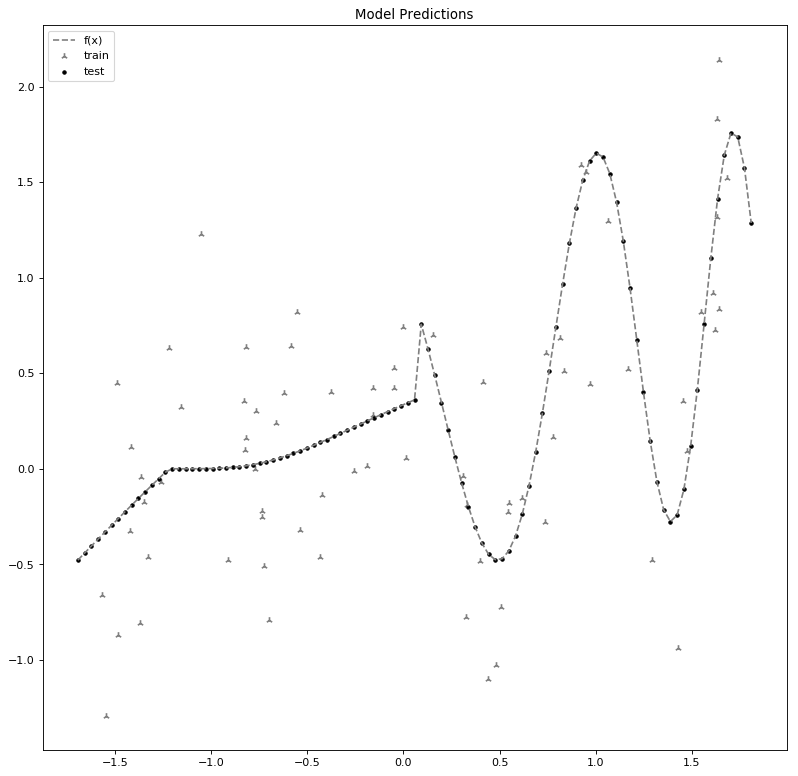

Simulation Confiugration Information:
 
We're plotting the function: the_nightmare with 0.5 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 100 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


In [192]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "the_nightmare"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

**TEMP:**

Data Driven Robustness Rule:
Using [this article](https://www.sciencedirect.com/science/article/pii/S0378375815000403) for the variance estimate.  
$$
\hat{\sigma}^2 \triangleq
\frac1{(n-1)}\sum_{1<n\leq N} (y_n - y_{n-1})^2
.
$$

We couple it to the problem via the following
$$
\underset{\underset{0\leq w_n\leq 1}{\sum_{n\leq N} w_n=1}}{\operatorname{argmax}} \sum_{n\leq N} w_n L(f(x_n),\hat{f}(x_n),x_n) - \sigma^2 \sum_{n\leq N} w_n \ln\left(\frac{w_n}{N}\right)
.
$$

In [193]:
# GET STATISTICAL VARIANCE ESTIMATE
var_estimate = np.sum(np.diff(data_y)**2)/(((data_y.shape[0])-1))
var_estimate = np.float(round(var_estimate,3))

robustness_dictionary = {'robustness_parameter': [var_estimate,var_estimate*2,var_estimate*3]}
#==================================================================================#        
### Create NEU parameter disctionary by parameters joining model it is upgrading ###
#==================================================================================#
param_grid_Vanilla_Nets = {**Training_dictionary,
                       **Vanilla_ffNN_dictionary,
                       **Epochs_dictionary}

param_grid_NEU_Nets = {**Training_dictionary,
                       **robustness_dictionary,
                       **Vanilla_ffNN_dictionary,
                       **param_grid_NEU_readout_extra_parameters,
                       **param_grid_NEU_feature_extra_parameters,
                       **NEU_Epochs_Feature_dictionary_coupled}

param_grid_NEU_Feature_Only_Nets = {**Training_dictionary,
                                    **robustness_dictionary,
                                    **param_grid_NEU_feature_extra_parameters,
                                    **NEU_Epochs_Feature_dictionary}

NEU_Structure_Dictionary = {**Training_dictionary,
                            **robustness_dictionary,
                            **param_grid_NEU_readout_extra_parameters,
                            **NEU_Epochs_dictionary}

# Benchmark Models

Run univariate regression benchmarks file:

In [194]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0799s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.1152s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    2.7s finished


Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5766 - mse: 0.5421 - mae: 0.5766 - mape: 113.5456
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5417 - mae: 0.5765 - mape: 113.0243
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5763 - mse: 0.5414 - mae: 0.5763 - mape: 112.6751
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5761 - mse: 0.5410 - mae: 0.5761 - mape: 112.0825
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5760 - mse: 0.5406 - mae: 0.5760 - mape: 111.5301
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5403 - mae: 0.5758 - mape: 111.2458
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5399 - mae: 0.5756 - mape: 110.9458
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5754 - mse: 0.5396 - mae: 0.5754 - mape: 110.2386
Epoch 9/

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [195]:
# Second Round Re-Initializations (Global Level) #
#================================================#
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Boost input dimension if $d=1$, so that reconfigurations can be universal.

In [196]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test],axis=1)
    d = d+1
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print("Modified Input since Dimension is too low")

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [ ]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.4s finished


Epoch 1/10


---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
# NEU_lin_reg = LinearRegression()
# NEU_lin_reg.fit(data_x_featured_train,data_y)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
NEU_lin_reg = ElasticNetCV(cv=5, random_state=0, alphas = np.linspace(0,(10**2),(10**2)),
                           l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

In [ ]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

#### Visual Comaprison between the OLS and the NEU-OLS models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test,"OLS")

#### Comparison between Elastic-Net and NEU-ENET

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

---
# Non-Linear Models
---

### NEU-Smoothing Splines

In [13]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test = get_smooting_splines(data_x = (data_x_NEU_train_feature_only.mean(axis=1)),
                                                                                       data_x_test = (data_x_NEU_test_feature_only.mean(axis=1)),
                                                                                       data_y = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_Ssplines = np.concatenate([data_x_featured_train,
                                   NEU_Ssplines_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_Ssplines = np.concatenate([data_x_featured_test,
                                  NEU_Ssplines_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_Ssplines_y_hat_train, NEU_Ssplines_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_Ssplines, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_Ssplines)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.6s finished


Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.0406 - mse: 0.6983 - mae: 0.6614 - mape: 103.9769
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.0529 - mse: 0.6963 - mae: 0.6608 - mape: 104.0486
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.0547 - mse: 0.6949 - mae: 0.6603 - mape: 104.1314
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.0498 - mse: 0.6925 - mae: 0.6595 - mape: 104.1756
Epoch 5/5
13/13 [==============================] - 0s 1ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved


#### Visual Comaprison between the Smoothing Splines and the NEU-Smoothing Splines models:

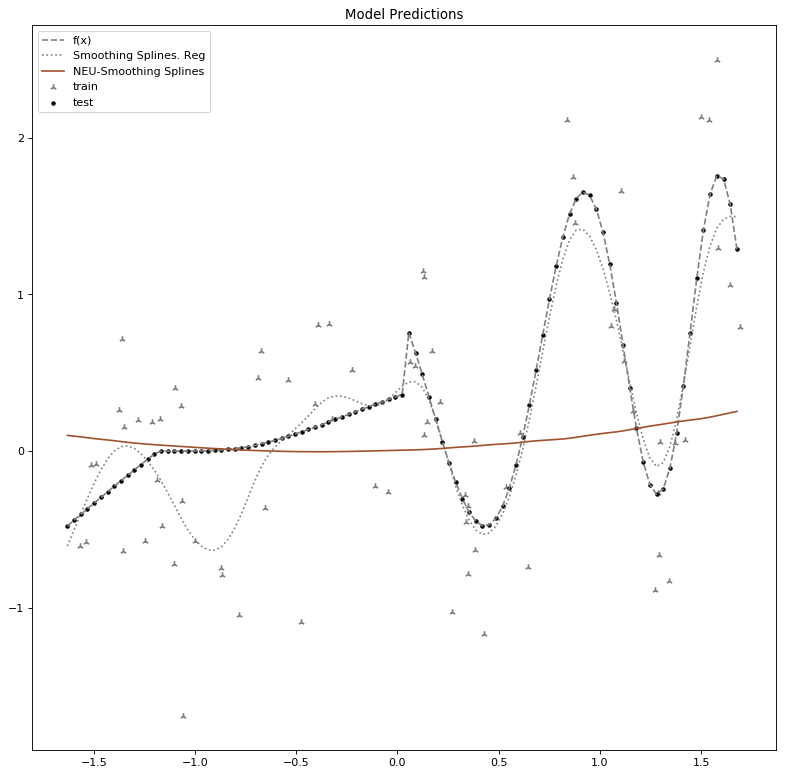

In [14]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test, color = 'grey',linestyle=":", label='Smoothing Splines. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_Ssplines_y_hat_test, color = 'sienna',label='NEU-Smoothing Splines')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

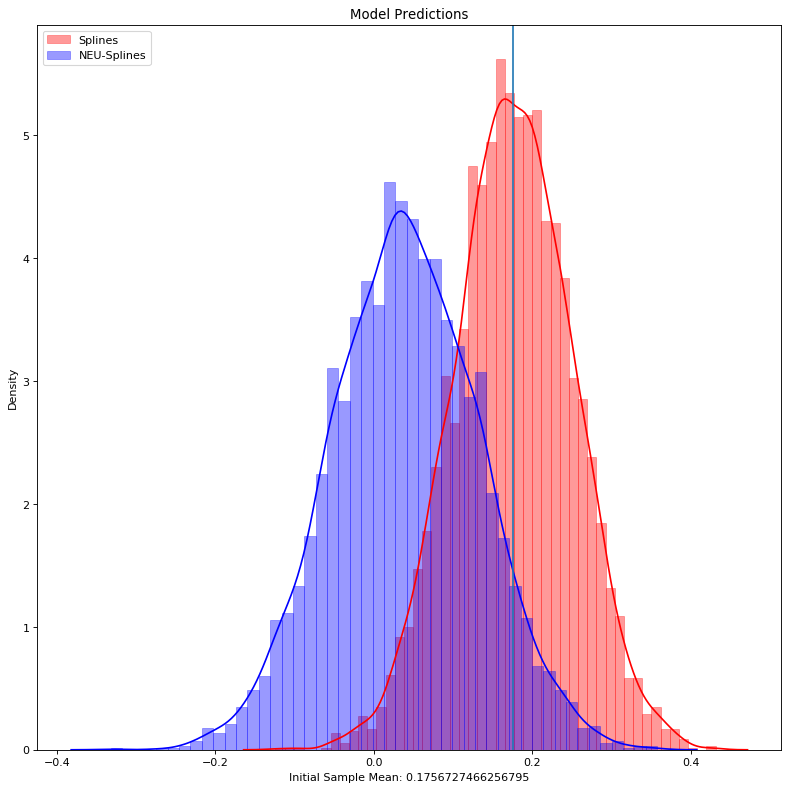

In [15]:
get_Error_distribution_plots(data_y_test,f_hat_smoothing_splines_test,NEU_Ssplines_y_hat_test,"Splines")

#### Numerical Comparison between the Smoothing Splines regressor and NEU-Smoothing Splines regressor models:

In [16]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Smoothing Splines Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Smoothing Splines Performance:")
print(reporter(NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test,data_y,data_y_test))

Smoothing Splines Performance:
                 Train         Test
Er. 95L  -1.169984e-01     0.047078
Er. Mean -5.588123e-15     0.086170
Er. 95U   1.173546e-01     0.127633
MAE       4.059486e-01     0.162360
MSE       2.670792e-01     0.050619
MAPE      4.100561e+02  1074.189663
NEU-Smoothing Splines Performance:
                Train         Test
Er. 95L     -0.090042     0.113221
Er. Mean     0.087983     0.221727
Er. 95U      0.281490     0.337269
MAE          0.658512     0.425644
MSE          0.689670     0.375133
MAPE      4877.823646  3786.415246


### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [56]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train,NEU_KReg_y_hat_test, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_KReg = np.concatenate([data_x_featured_train,
                                   NEU_KReg_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_KReg = np.concatenate([data_x_featured_test,
                                  NEU_KReg_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_KReg_y_hat_train, NEU_KReg_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_KReg, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_KReg)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0240s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   13.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   13.2s finished


Epoch 1/5
10/10 [==============================] - 0s 5ms/step - loss: 0.5700 - mse: 0.3019 - mae: 0.4392 - mape: 109.5701
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 0.5708 - mse: 0.3004 - mae: 0.4381 - mape: 109.0617
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 0.5417 - mse: 0.2992 - mae: 0.4371 - mape: 108.7806
Epoch 4/5
10/10 [==============================] - 0s 5ms/step - loss: 0.5549 - mse: 0.2978 - mae: 0.4363 - mape: 108.4920
Epoch 5/5
13/13 [==============================] - 0s 2ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved


#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

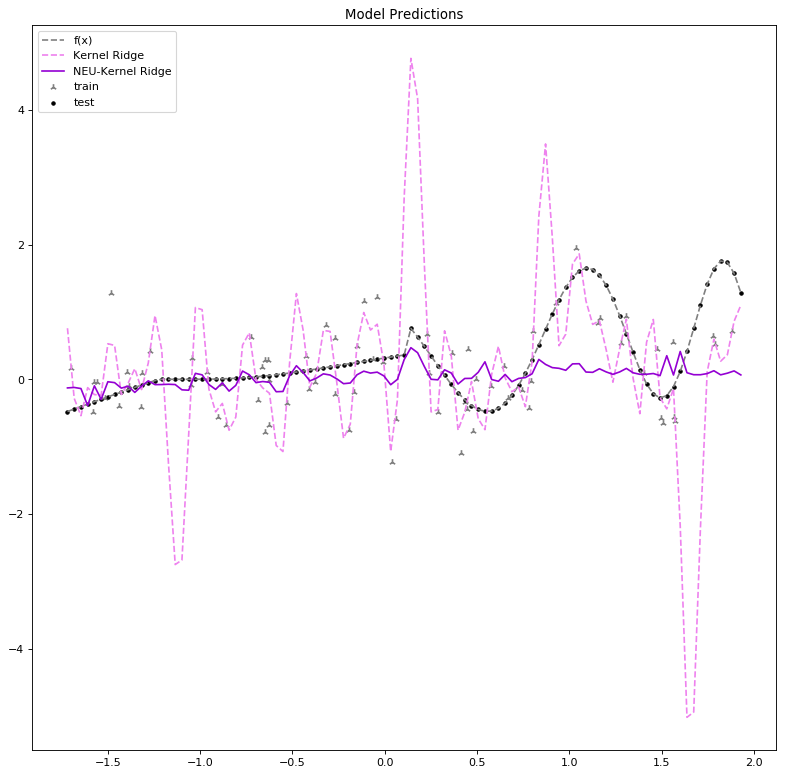

In [57]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

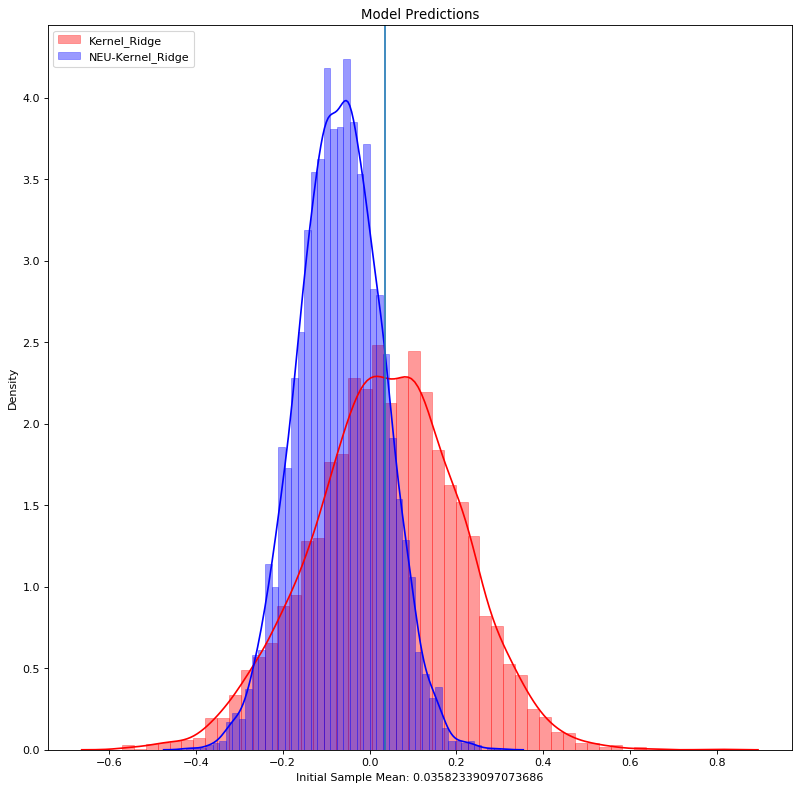

In [58]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [59]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
               Train        Test
Er. 95L    -0.059539   -0.106978
Er. Mean    0.000053    0.144151
Er. 95U     0.059175    0.412615
MAE         0.189520    0.861864
MSE         0.069198    1.788766
MAPE      146.134786  212.655111
NEU-Kernel Ridge-Performance:
                Train         Test
Er. 95L     -0.052458     0.140321
Er. Mean     0.067056     0.246035
Er. 95U      0.192372     0.357302
MAE          0.434313     0.403021
MSE          0.295453     0.365822
MAPE      5521.147335  1965.469969


## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [65]:
# TEMP
exec(open('HyperParameter_Grid.py').read())

Parameter Grids Build and Loaded!


In [66]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_GBRF = np.concatenate([data_x_featured_train,
                                   NEU_GBRF_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_GBRF = np.concatenate([data_x_featured_test,
                                  NEU_GBRF_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
# ========================#
NEU_GBRF_y_hat_train, NEU_GBRF_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_GBRF, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_GBRF)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0768s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   16.2s finished


Epoch 1/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7284 - mse: 0.8435 - mae: 0.7284 - mape: 107.8328
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7274 - mse: 0.8405 - mae: 0.7274 - mape: 107.9051
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7265 - mse: 0.8380 - mae: 0.7265 - mape: 108.0521
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7256 - mse: 0.8357 - mae: 0.7256 - mape: 108.1312
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7247 - mse: 0.8331 - mae: 0.7247 - mape: 108.2305
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7237 - mse: 0.8307 - mae: 0.7237 - mape: 108.1227
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7227 - mse: 0.8278 - mae: 0.7227 - mape: 108.1905
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7218 - mse: 0.8252 - mae: 0.7218 - mape: 108.6161
Epoch 9/

#### Visual Comaprison between the GBRF and the NEU-GBRF models:

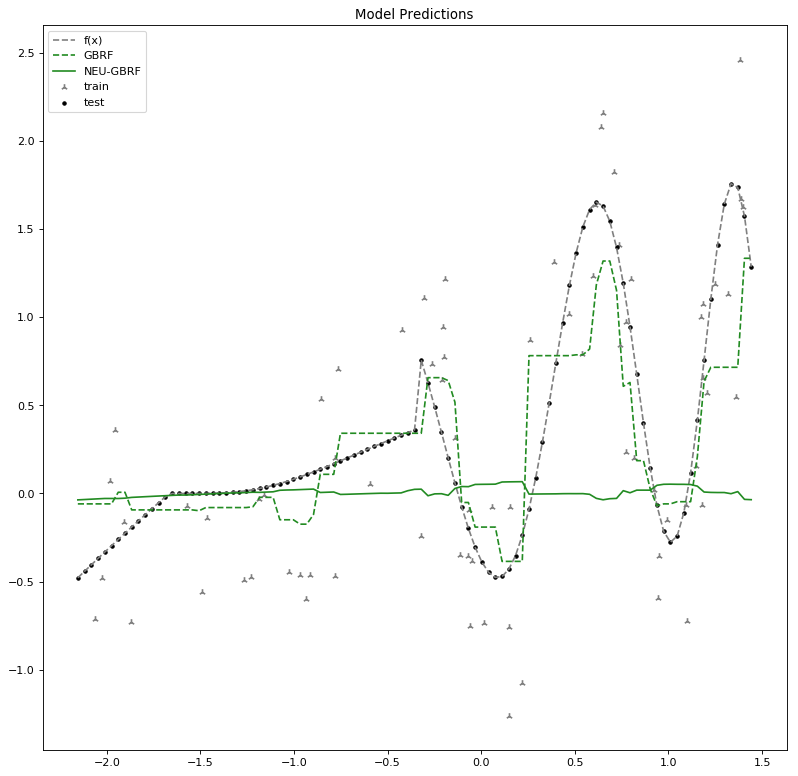

In [67]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

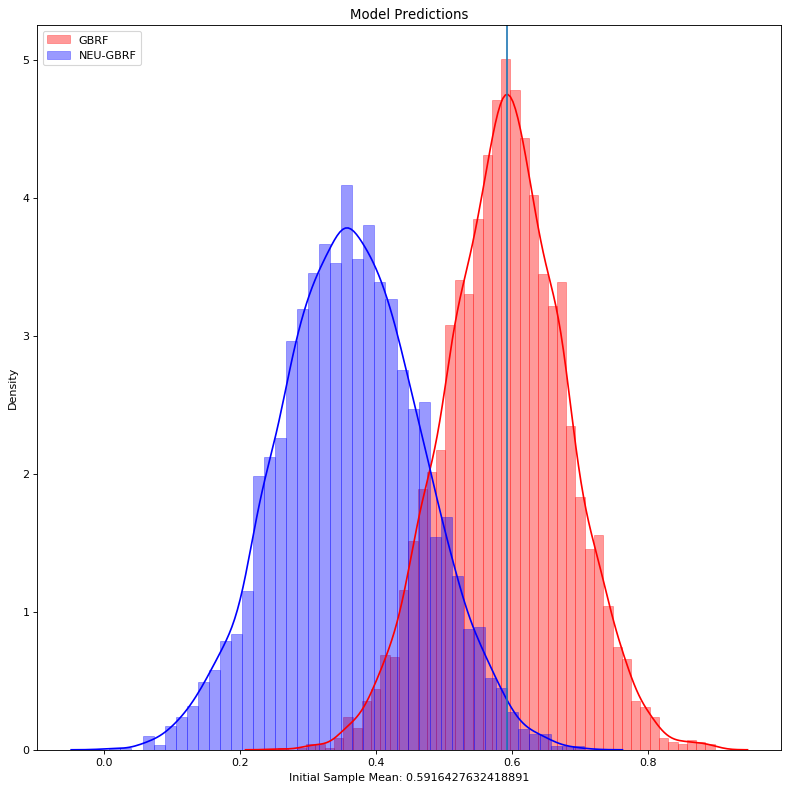

In [68]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [69]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
                 Train        Test
Er. 95L  -9.615552e-02   -0.011499
Er. Mean  5.921189e-18    0.049738
Er. 95U   9.562914e-02    0.113123
MAE       3.437103e-01    0.229682
MSE       1.746535e-01    0.104987
MAPE      2.842145e+02  193.856793
NEU-GBRF-Performance:
                 Train          Test
Er. 95L       0.119793      0.164348
Er. Mean      0.310667      0.278380
Er. 95U       0.504286      0.401591
MAE           0.719602      0.442038
MSE           0.819261      0.448189
MAPE      14772.639129  13138.220840


---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [25]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   15.7s finished


Epoch 1/50
10/10 [==============================] - 0s 5ms/step - loss: 1.0813 - mse: 0.7246 - mae: 0.6611 - mape: 95.6722
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 1.0904 - mse: 0.7242 - mae: 0.6610 - mape: 95.7986
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 1.0937 - mse: 0.7241 - mae: 0.6609 - mape: 95.8908
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 1.0959 - mse: 0.7235 - mae: 0.6608 - mape: 96.0890
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9952 - mse: 0.7230 - mae: 0.6606 - mape: 96.3025
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 1.0979 - mse: 0.7229 - mae: 0.6606 - mape: 96.4637
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 1.0420 - mse: 0.7225 - mae: 0.6605 - mape: 96.5406
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 1.0682 - mse: 0.7224 - mae: 0.6605 - mape: 96.6180
Epoch 9/50
10/10

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [26]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.5s finished


Epoch 1/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1641 - mse: 0.7945 - mae: 0.6902 - mape: 114.9200
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1908 - mse: 0.7925 - mae: 0.6894 - mape: 114.2735
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 1.2138 - mse: 0.7909 - mae: 0.6887 - mape: 113.6581
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 1.2036 - mse: 0.7885 - mae: 0.6880 - mape: 113.1006
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 1.0477 - mse: 0.7866 - mae: 0.6871 - mape: 112.3480
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1853 - mse: 0.7851 - mae: 0.6866 - mape: 111.8331
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1114 - mse: 0.7832 - mae: 0.6858 - mape: 111.3148
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1494 - mse: 0.7820 - mae: 0.6854 - mape: 110.8748
Epoch 9/

#### Decoupled Implementation

In [27]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Completed Above
print("Phase 1 Complete: Feature Map Trained/Loaded")

# 2) Train ffNN #
#===============#
NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
                                                                   n_jobs = n_jobs, 
                                                                   n_iter = n_iter, 
                                                                   param_grid_in = param_grid_Vanilla_Nets,  
                                                                   X_train = data_x_NEU_train_feature_only, 
                                                                   y_train = data_y,
                                                                   X_test = data_x_NEU_test_feature_only)
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Update User #
#-------------#
print("Phase 2 Complete: Trained Vanilla Model")

# 3) Learn Structure Map #
#========================#
NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

# Update User #
#-------------#
print("Phase 3 Complete: Trained NEU-Structure Map")
print("NEU Statue: Trained")

Phase 1 Complete: Feature Map Trained/Loaded
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.2s finished


Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6749 - mse: 0.7533 - mae: 0.6749 - mape: 103.0085
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6748 - mse: 0.7529 - mae: 0.6748 - mape: 102.9177
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6747 - mse: 0.7527 - mae: 0.6747 - mape: 102.8444
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6746 - mse: 0.7523 - mae: 0.6746 - mape: 102.7825
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6744 - mse: 0.7521 - mae: 0.6744 - mape: 102.6942
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6743 - mse: 0.7518 - mae: 0.6743 - mape: 102.6166
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6742 - mse: 0.7514 - mae: 0.6742 - mape: 102.5421
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6741 - mse: 0.7512 - mae: 0.6741 - mape: 102.4860
Epoch 9/

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    6.9s finished


Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.2033 - mse: 0.8171 - mae: 0.6952 - mape: 116.6180
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 1.2233 - mse: 0.8152 - mae: 0.6945 - mape: 116.2281
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.2496 - mse: 0.8138 - mae: 0.6941 - mape: 115.9110
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 1.2495 - mse: 0.8116 - mae: 0.6933 - mape: 115.5705
Epoch 5/5
13/13 [==============================] - 0s 2ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved
Phase 3 Complete: Trained NEU-Structure Map
NEU Statue: Trained


## Visualization

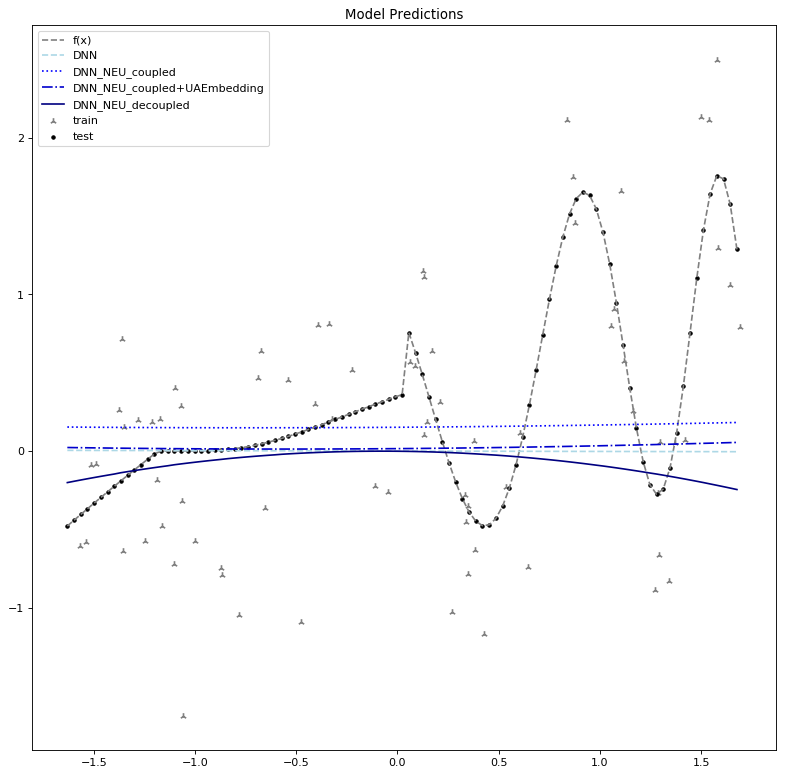

In [28]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

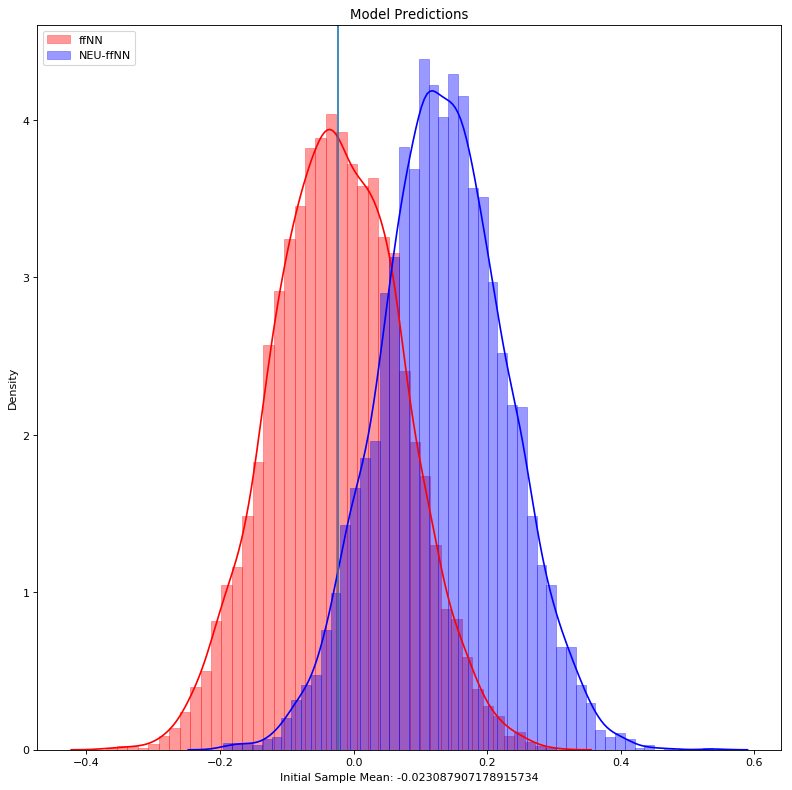

In [29]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [30]:
#==========#
# Training #
#==========#
train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

train_performance.to_latex("./outputs/tables/Train_performance.tex")

#=========#
# Testing #
#=========#
test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

test__performance.to_latex("./outputs/tables/Test_performance.tex")

# Visualize Predictions

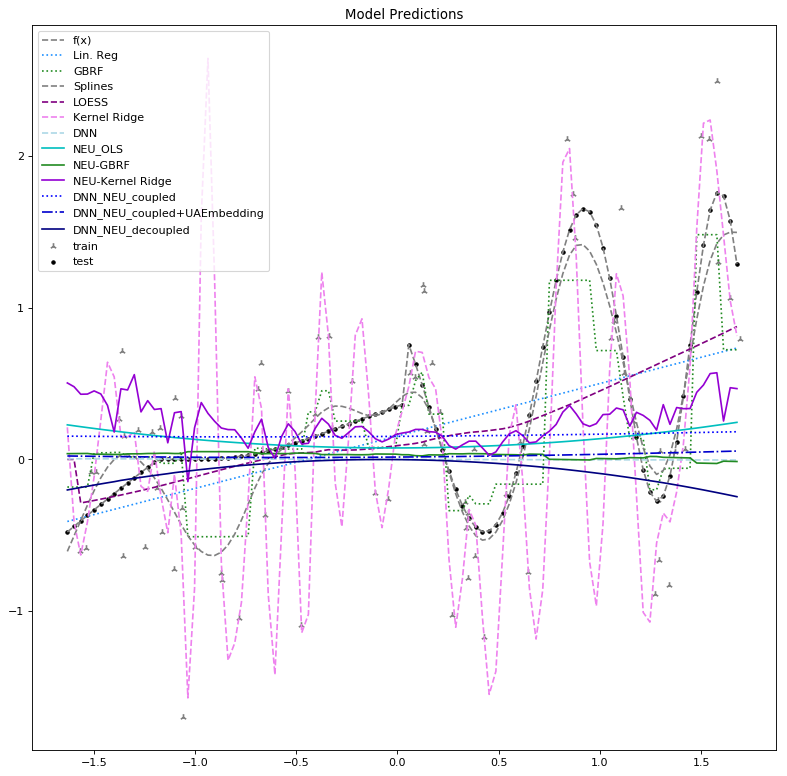

In [31]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='OLS')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [32]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
               Train        Test
Er. 95L    -0.164801    0.041320
Er. Mean    0.020298    0.154855
Er. 95U     0.213581    0.272862
MAE         0.660744    0.438588
MSE         0.707198    0.376241
MAPE      537.742621  332.849448


In [33]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
               Train        Test
Er. 95L    -0.069128    0.068229
Er. Mean    0.000027    0.222840
Er. 95U     0.065125    0.374048
MAE         0.205759    0.610958
MSE         0.089677    0.666124
MAPE      226.717530  140.234990
NEU-Kernel Ridge-Performance:
               Train        Test
Er. 95L    -0.292057   -0.070554
Er. Mean   -0.115950    0.040634
Er. 95U     0.063834    0.155797
MAE         0.644565    0.444145
MSE         0.641438    0.337880
MAPE      303.814851  211.372265


In [34]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
                 Train        Test
Er. 95L  -1.070973e-01    0.056231
Er. Mean -1.480297e-17    0.118446
Er. 95U   1.056762e-01    0.181607
MAE       3.677988e-01    0.255524
MSE       2.130905e-01    0.116517
MAPE      4.354469e+02  171.199399
NEU-GBRF-Performance:
                Train          Test
Er. 95L     -0.063621      0.142219
Er. Mean     0.127753      0.258315
Er. 95U      0.330134      0.379367
MAE          0.676308      0.443726
MSE          0.761221      0.446029
MAPE      8110.021401  59992.600541


In [35]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
                 Train         Test
Er. 95L  -1.151023e-01     0.046831
Er. Mean -5.588123e-15     0.086170
Er. 95U   1.161197e-01     0.128296
MAE       4.059486e-01     0.162360
MSE       2.670792e-01     0.050619
MAPE      4.100561e+02  1074.189663
LOESS Performance:
                Train      Test
Er. 95L     -0.187040  0.018617
Er. Mean    -0.012954  0.109270
Er. 95U      0.157568  0.204113
MAE          0.628602  0.355667
MSE          0.587676  0.237036
MAPE      1038.315197       inf


In [36]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
print("NEU-ffNN (Decoupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
                 Train          Test
Er. 95L      -0.036510      0.170605
Er. Mean      0.154353      0.284930
Er. 95U       0.346865      0.405392
MAE           0.671729      0.440407
MSE           0.746110      0.443571
MAPE      56976.522182  53705.628501
NEU-ffNN (Coupled) Performance:
               Train        Test
Er. 95L    -0.187375    0.015182
Er. Mean   -0.003118    0.127600
Er. 95U     0.194769    0.247405
MAE         0.659664    0.431343
MSE         0.713280    0.369991
MAPE      413.062230  264.330513
NEU-ffNN (Coupled+UAEmbedding) Performance:
                Train         Test
Er. 95L     -0.059787     0.147655
Er. Mean     0.130434     0.261314
Er. 95U      0.323524     0.379996
MAE          0.664711     0.432626
MSE          0.729004     0.420941
MAPE      3057.515631  1587.586519
NEU-ffNN (Decoupled) Performance:
                Train         Test
Er. 95L      0.049083     0.243768
Er. Mean     0.236646     0.361738
Er. 95U      0.434851     0.4871

# Report

## Re-Summarize Learning Problem for easy recap :)

In [37]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

Simulation Confiugration Information:
 
We're plotting the function: the_nightmare with 0.5 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 100 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


## Train-Set Performance

In [38]:
train_performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.117626,-5.588123e-15,0.117895,0.405949,0.267079,410.056096
LOESS,-0.185863,-1.295406e-02,0.161255,0.628602,0.587676,1038.315197
Elastic Net,-0.174641,4.440892e-18,0.174880,0.639544,0.601174,499.661135
NEU-OLS,-0.165547,2.029761e-02,0.211113,0.660744,0.707198,537.742621
Kernel,-0.066171,2.711505e-05,0.066853,0.205759,0.089677,226.717530
NEU-KerRidge,-0.297915,-1.159504e-01,0.064598,0.644565,0.641438,303.814851
GBRF,-0.105935,-1.480297e-17,0.104253,0.367799,0.213091,435.446913
NEU-GBRF,-0.060627,1.277531e-01,0.324626,0.676308,0.761221,8110.021401
ffNN,-0.038506,1.543531e-01,0.348189,0.671729,0.746110,56976.522182
NEU-ffNN (Readout-Form),-0.191610,-3.118176e-03,0.192634,0.659664,0.713280,413.062230


## Test-Set Performance

In [39]:
test__performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,0.046773,0.086170,0.127488,0.162360,0.050619,1.074190e+03
LOESS,0.015352,0.109270,0.205523,0.355667,0.237036,inf
Elastic Net,0.027226,0.122525,0.214561,0.373058,0.242096,2.185819e+02
NEU-OLS,0.044586,0.154855,0.272545,0.438588,0.376241,3.328494e+02
Kernel,0.068431,0.222840,0.376318,0.610958,0.666124,1.402350e+02
NEU-KerRidge,-0.071224,0.040634,0.154985,0.444145,0.337880,2.113723e+02
GBRF,0.057468,0.118446,0.183140,0.255524,0.116517,1.711994e+02
NEU-GBRF,0.141760,0.258315,0.385011,0.443726,0.446029,5.999260e+04
ffNN,0.170750,0.284930,0.407264,0.440407,0.443571,5.370563e+04
NEU-ffNN (Readout-Form),0.014332,0.127600,0.248053,0.431343,0.369991,2.643305e+02


#### The END

---